<h1><center>Solving Differential Equation with Finite Difference Method</center></h1>

## $$ y''=p(x).y'+q(x).y+r(x) ~~~~~~~ a \le{} x \le{} b $$
## $$ y(a)= \alpha , y(b)= \beta $$

---

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
plt.style.use('seaborn-poster')
%matplotlib inline
#%matplotlib notebook
h = 1/2


## $$ y''(x) = x.y'(x)-y+1 $$
### $$ y(0)=1, ~ y(4)=5 $$

## by solving the equation below - with Thomas Algorithm, we find the answer we looking for:

## $ Ay = b $

### $ A_{N-1} =
  \begin{pmatrix}
   \beta_{1} & \gamma_{1}\\
   \alpha_{2} & \beta_{2} & \gamma_{2}\\
     & & \ddots \\
     & & \alpha_{N-2} & \beta_{N-2}& \gamma_{N-2}\\
     & & & \alpha_{N-1} & \beta_{N-1}
  \end{pmatrix}  
  ~~~~
  ,y = 
  \begin{pmatrix}
   y_1\\
   y_2\\
   \vdots \\
   y_{N-2}\\
   y_{N-1}
  \end{pmatrix}  
  ~~~~
  ,b = 
  \begin{pmatrix}
   -h^2 r_1 - \alpha \alpha_1\\
   -h^2 r_2\\
   \vdots \\
   -h^2 r_{N-2}\\
   -h^2 r_{N-1}- \beta \gamma_{N-1}
  \end{pmatrix} 
  $
  $
  \newline$
### $
  \newline
  \alpha_i = - {{h} \over {2}}. p_i -1
  ~~~~
  \beta_i = h^2 q_i + 2
  ~~~~
  \gamma_i = {h \over 2}.p_i-1
  $
  $ \newline
  p_i = p(a+ih),
  ~~~~
  q_i = q(a+ih)
  $

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[ 0.   -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 50.  ]


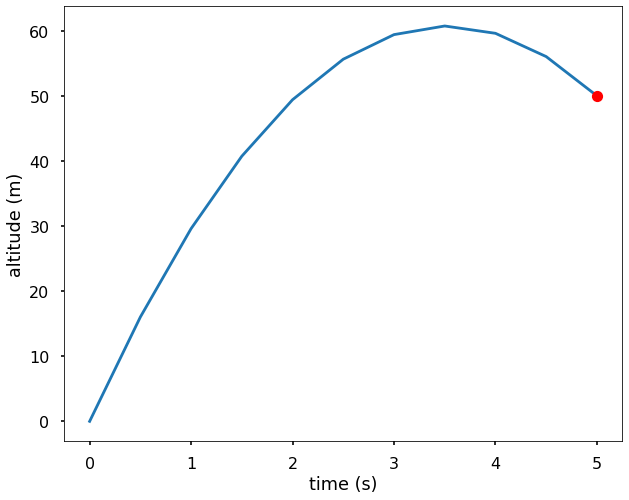

In [2]:
n = 10
h = (5-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(n+1)
b[1:-1] = -9.8*h**2
b[-1] = 50
print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

t = np.linspace(0, 5, 11)

plt.figure(figsize=(10,8))
plt.plot(t, y)
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()

In [3]:
y_n1 = -9.8*h**2 + 2*y[0] - y[1]
(y[1] - y_n1) / (2*h)

34.5

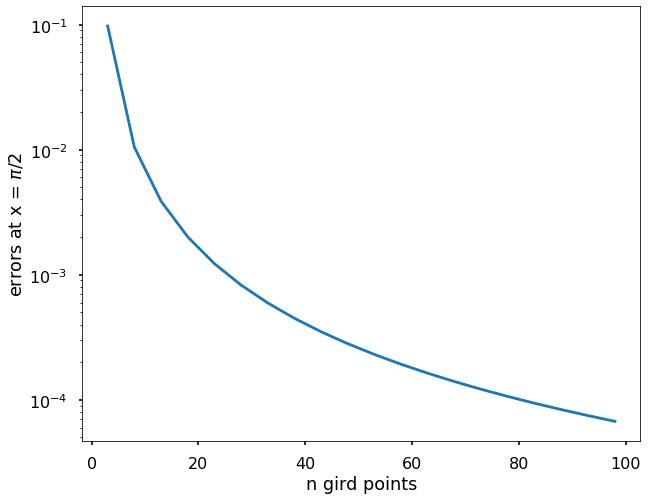

In [4]:
def get_a_b(n):
    h = (np.pi/2-0) / n
    x = np.linspace(0, np.pi/2, n+1)
    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = -2+4*h**2
    A[n, n-1] = 2
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2+4*h**2
        A[i, i+1] = 1

    # Get b
    b = np.zeros(n+1)
    for i in range(1, n+1):
        b[i] = 4*h**2*x[i]
    
    return x, A, b

x = np.pi/2
v = x - np.sin(2*x)

n_s = []
errors = []

for n in range(3, 100, 5):
    x, A, b = get_a_b(n)
    y = np.linalg.solve(A, b)
    n_s.append(n)
    e = v - y[-1]
    errors.append(e)
    
plt.figure(figsize = (10,8))
plt.plot(n_s, errors)
plt.yscale('log')
plt.xlabel('n gird points')
plt.ylabel('errors at x = $\pi/2$')
plt.show()

## Simple Problem 


In [5]:
def p(x):
    return x
def q(x):
    I = np.ones(len(x))
    return -I
def r(x):
    I = np.ones(len(x))
    return I

a = 0
alpha = 1

b = 4
beta = 5

In [7]:
def apha_i(h,x):
    I = np.ones(len(x))
    return -h/2 * p(x) -1*I
def beta_i(h,x):
    I = np.ones(len(x))
    return h**2 * q(x) +2*I
def gamma_i(h,x):
    I = np.ones(len(x))
    #print(I)
    return h/2 * p(x) -1*I

In [8]:
def F(x):
    return x+1

In [9]:
x = np.arange(a+h,b,h)

Alpha = apha_i(h,x)
Beta = beta_i(h,x)
Gamma = gamma_i(h,x)

B = -h**2 * r(x)
#print(B[0],B[-1])
B[0] = B[0] - alpha * Alpha[0]
B[-1] = B[-1] - beta * Gamma[-1]


Alpha = (np.delete(Alpha, 0))
Gamma = (np.delete(Gamma, -1))

In [10]:
n = len(Beta)
A = np.zeros((n,n))

for i in range(n):
    A[i][i]=Beta[i]
for i in range(n-1):
    A[i+1][i]=Alpha[i]
    A[i][i+1]=Gamma[i]
y = np.linalg.solve(A, B)

In [11]:
def err(Y,y):
    return np.abs(Y-y)

In [12]:
import pandas as pd;
def data(x,y,h):
    
    y = np.concatenate(([alpha], y, [beta]))
    x = np.concatenate(([a], x, [b]))
    Y= F(x)
    df = pd.DataFrame({'x': x, 'Real value':Y ,
                       'FDM': y,
                       'Error':err(Y,y)})
    return df

In [13]:
data(x,y,h)

,x,Real value,FDM,Error
0,0.0,1.0,1.0,0.000000e+00
1,0.5,1.5,1.5,6.106227e-14
2,1.0,2.0,2.0,1.223466e-13
3,1.5,2.5,2.5,1.825207e-13
4,2.0,3.0,3.0,2.424727e-13
5,2.5,3.5,3.5,3.015366e-13
6,3.0,4.0,4.0,3.561595e-13
7,3.5,4.5,4.5,3.819167e-13
8,4.0,5.0,5.0,0.000000e+00
